In [2]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np


[[11 10  8  9  7  5  2  6  4  1  3  0]
 [11 10  9  5  1  2  8  4  7  0  6  3]]


IndexError: index 11 is out of bounds for axis 0 with size 2

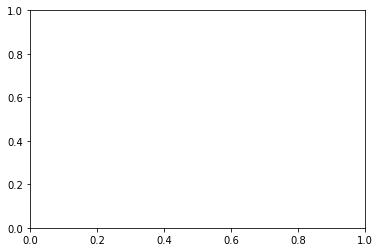

In [269]:
fig, ax = plt.subplots()
lasso = np.array([0.8750, 0.8125, 0.4219, 0.8438,\
                  0.5000, 0.2891, 0.4688, 0.2617, 0.1406,0.2441, 0.0273, 0.0098])
# ours = np.array([0.5,0.406,0.406,0.6485,0.46875,0.3828,\
#                  0.6328,0.4765,0.4257,0.3183,0.1054,0.0781])

x = np.vstack([lasso, ours])
ind = np.argsort(x,axis=1)
print(ind)
# x = (x.reshape([2,-1]))
# x = (x / np.linalg.norm(x)).reshape([2,-1])

# im = ax.imshow(x)
# ours 0.125

# for i in range(1):
#     for j in range(lasso.shape[0]):
#         text = ax.text(j,i,int(x[j,i]*100)/100,ha="center",va="center",color="white")


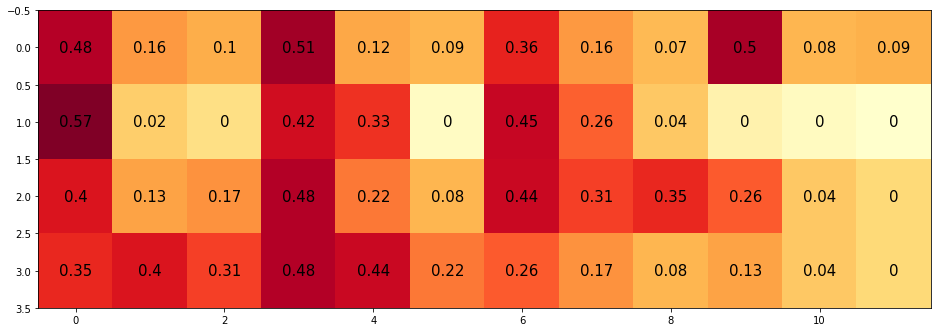

In [6]:
fig, ax = plt.subplots(figsize=[16,9])
# T_grads 1st 100 iter's Mean ; 
# DIR: /home/zhaotianchen/code/pt_adv/logs/res18/plan1/pretrain/budget_0.125'
grads = np.array([-0.21046494, -0.07042833, -0.04646142, -0.22305243, -0.05327817,
-0.03906904, -0.15812522, -0.07029 , -0.03422718, -0.21947866,
-0.03751051, -0.04256288])
grads = (grads / np.linalg.norm(grads))
grads = (-1)*grads


# DIR: /home/zhaotianchen/code/pt_adv/logs/res18/lasso/lambda/lambda_5e-03
# lasso = [0.8750, 0.8125, 0.4219, 0.8438,\
#                   0.5000, 0.2891, 0.4688, 0.2617, 0.1406,0.2441, 0.0273, 0.0098]

# DIR /home/zhaotianchen/code/pt_adv/logs/res18/lasso/lambda/lambda_1e-02
# 10.2% FLOPs
lasso = [0.3438, 0.3750, 0.2812, 0.9375, 0.3750, 0.2109, 0.2773, 0.1328, 
         0.1133,0.1172, 0.0488, 0.0078]

# Ours
x = [0.357, 0.273, 0.278, 0.543, 0.289, 0.267, 0.503, 0.319, 0.319, 0.308, 0.159, 0.151]
x_ = x
x0 = 10*np.log2(x)

# Sensitivity
sens = [55.820,1.220,0.810,20.410,10.900,0.310,24.050,6.260,1.350,0.430,0.320, 0.270]    

ind = np.argsort(x)
for i,j in enumerate(ind):
    x[j] = i
    

ind = np.argsort(lasso)
for i,j in enumerate(ind):
    lasso[j] = i

# plt.plot(x, label="rank")

x = np.array(x).reshape([1,-1])
x = (x / np.linalg.norm(x))
lasso = np.array(lasso).reshape([1,-1])
lasso = (lasso / np.linalg.norm(lasso))
sens = np.log2(sens)
sens = (sens / np.linalg.norm(sens))
x0 = np.vstack([grads,sens,x,lasso])
# im = ax.imshow(x0, cmap="GnBu")
im = ax.imshow(x0, cmap="YlOrRd")

for i in range(12):
    for j in range(4):
        text = ax.text(i,j,int(x0[j,i]*100)/100 if int(x0[j,i]*100)/100 > 0 else 0 ,ha="center",va="center",color="black",fontsize=15)
        

SyntaxError: invalid syntax (<ipython-input-65-5da915dd6342>, line 1)

In [125]:
np.arange(-0.3,0.3,0.1)

array([-3.00000000e-01, -2.00000000e-01, -1.00000000e-01,  5.55111512e-17,
        1.00000000e-01,  2.00000000e-01])

In [66]:
# At Begin
sens = np.array([25.820,1.220,0.810,20.410,10.900,0.310,24.050,6.260,1.350,0.430,0.320, 0.270] )
grads = np.array([-0.21046494, -0.07042833, -0.04646142, -0.22305243, -0.05327817,
-0.03906904, -0.15812522, -0.07029 , -0.03422718, -0.021947866,
-0.03751051, -0.04256288])

# After 40 Epoch
sens = (sens - np.mean(sens)) / np.std((np.abs(sens)))
grads = (grads - np.mean(grads)) / np.std((np.abs(grads)))
print(sens, grads)



[ 1.88075559 -0.66965578 -0.71216263  1.31987244  0.33392073 -0.76400026
  1.69725038 -0.14713247 -0.65617799 -0.75155923 -0.76296351 -0.76814727] [-1.85572367  0.19836046  0.54991174 -2.04035941  0.44992233  0.6583446
 -1.08799451  0.20038951  0.72936594  0.9094813   0.68120542  0.60709628]


[0.28600003 0.03666812 0.02579954 0.34399518 0.02851259 0.02314835
 0.1327228  0.0365938  0.02156135 0.01800747 0.02262517 0.02436559] [0.30634387 0.02391    0.02291496 0.17483192 0.06522699 0.02175737
 0.25498456 0.04031889 0.02423444 0.02202974 0.02177993 0.02166732]


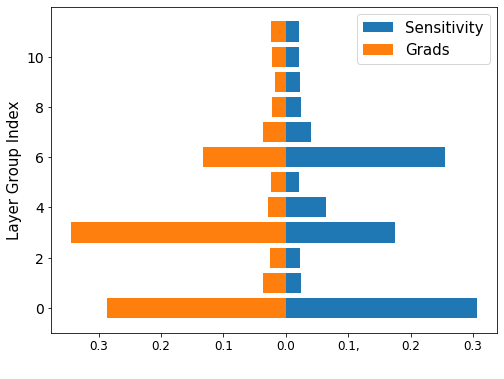

In [48]:
def softmax(x, tau):
    """ Returns softmax probabilities with temperature tau
        Input:  x -- 1-dimensional array
        Output: s -- 1-dimensional array
    """
    e_x = np.exp(x / tau)
    return e_x / e_x.sum()

# At Begin
sens = np.array([25.820,1.220,0.810,20.410,10.900,0.310,24.050,6.260,1.350,0.430,0.320, 0.270] )
grads = np.array([-0.21046494, -0.07042833, -0.04646142, -0.22305243, -0.05327817,
-0.03906904, -0.15812522, -0.07029 , -0.03422718, -0.021947866,
-0.03751051, -0.04256288])

grads = np.abs((grads / np.linalg.norm(grads)))
sens = np.abs((sens / np.linalg.norm(sens)))
grads = softmax(grads, np.std(grads))
sens = softmax(sens, np.std(sens))
print (grads,sens)
fig, ax = plt.subplots(figsize=[8.,6])
cmap0 = plt.cm.Blues
# norm = matplotlib.colors.Normalize(vmin=1.5, vmax=4.5)
cmap1 = plt.cm.Reds
# color="#0d9cf5   color="#ff9900"
horiz_bars = ax.barh(range(sens.shape[0]),sens, align='center',
                     label="Sensitivity")
horiz_bars = ax.barh(range(sens.shape[0]),(-1)*grads, align='center',
                     label="Grads")
plt.xticks(np.arange(-0.3,0.4,0.1),['0.3','0.2','0.1','0.0','0.1,','0.2','0.3'],fontsize=12)
plt.yticks(fontsize=14)
ax.legend(fontsize=15)
plt.xlabel(" ", fontsize=15,horizontalalignment='center')
plt.ylabel("Layer Group Index",fontsize=15)
plt.savefig("sens_grad.pdf")

[1. 2. 3. 4. 5.] [-5. -4. -3. -2. -1.]


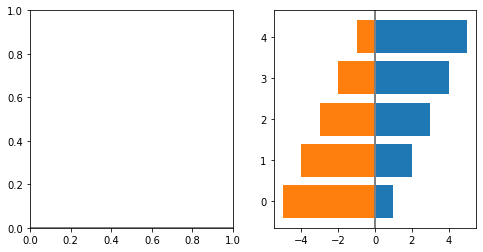

In [18]:

x = np.arange(5)
y1 = np.array([1.,2.,3.,4.,5.])
y2 = np.array([-5.,-4.,-3.,-2.,-1.])
fig, axes = plt.subplots(ncols=2, figsize=plt.figaspect(1./2))

print(y1,y2)
# vert_bars = axes[0].bar(x, y, color='lightblue', align='center')
horiz_bars = axes[1].barh(x, y1, align='center')
horiz_bars = axes[1].barh(x, y2, align='center')

# I'll also introduce axhline & axvline to draw a line all the way across the axes
# This can be a quick-n-easy way to draw an axis "spine".
axes[0].axhline(0, color='gray', linewidth=2)
axes[1].axvline(0, color='gray', linewidth=2)

plt.show()

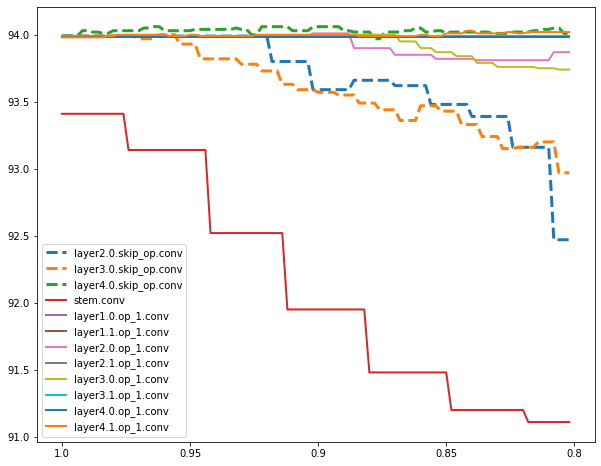

In [59]:
import torch
sensitivity_dict = torch.load("sens.t7")
plt.figure(figsize=[10,8])
for name in sensitivity_dict:
    if "skip" in name:
        acc = []
        for i in sensitivity_dict[name]:
            acc.append(i[0])
        plt.plot(acc, label=name, linestyle="--",linewidth=3)
for idx, name in enumerate(sensitivity_dict):
    if not "skip" in name:
        acc = []
        for i in sensitivity_dict[name]:
            acc.append(i[0])
        plt.plot(acc, label=name, linewidth=2)
plt.legend()
plt.xticks(range(0,125,25), [1.00, 0.95, 0.9, 0.85, 0.80])
plt.savefig("sens.pdf")

In [18]:
# ResNet18 Results
d = {}
d["Ours"] = [[ 94.2, 93.6, 93.0,91.58,89.9],[0.3374, 0.1982, 0.12112,0.04063,0.02616]]
d["Morph"] = [[93.5,91.83,87.05],[0.62,0.08182,0.0329]]
d["Lasso"] = [[92.47,90.4,86.2],[0.5,0.25,0.11]]
d["TAS"] = [[92.88],[0.45]]
d["FPGM"] = [[91.09],[0.4]]
d["SFP"] = [[91.9,90.83],[0.5,0.4]]

# Res20
d = {}
BASELINE = 92.17
d["Ours"] = [[92.1,91.3,90.24],[0.74,0.501,0.325]]
d["Lasso"] = [[91.08,89.78,89.06],[0.738,0.518,0.346]]
d["Morph"] = [[90.64,90.1,88.72],[0.749,0.471,0.305]]
d["Variational"] = [[91.66],[0.835]]
d["SFP"] = [[90.83],[0.578]]
d["FPGM"] = [[91.09],[0.578]]
d["LCCL"] = [[91.68],[0.64]]


# ResNet50
d = {}
# d["baseline"] = 
d["Ours"] = [[93.84,93.8,93.73,93.41,92.28],[0.248,0.1396,0.07835,0.0494,0.02466]]
d["Morph"] = [[93.49,93.4,91.2,89.5],[0.621,0.2107,0.1043,0.0301]]
d["Lasso"] = [[92.79,91.2,85.67],[0.5448,0.2608,0.1143]]
d["TAS"] = [[93.69],[0.527]]
d["FPGM"] = [[93.49],[0.526]]
d["SFP"] = [[93.36],[0.526]]
d["AMC"] = [[91.9],[0.5]]
d["LCCL"] = [[92.81],[0.379]]
d["Variational"] = [[91.66],[0.8]]
d["LeGR"] = [[93.4,93.6,93.79],[0.5,0.6,0.7]]

# ResNet56
BASELINE = 93.12
d["Ours"] = [[93.08,92.91,92.2],[0.707,0.478,0.326]]
d["Lasso"] = [[92.06,89.78,89.06],[0.69,0.45,0.38]]
d["Morph"] = [[91.71,90.1,88.72],[0.692,0.519,0.397]]
d["Variational"] = [[92.26],[0.797]]
d["PFEC"] = [[91.3],[0.747]]
d["AMC"] = [[91.9],[0.5]]
d["CP"] = [[91.8],[0.5]]
d["SFP"] = [[92.26],[0.474]]
d["FPGM"] = [[92.93],[0.474]]
d["LCCL"] = [[92.8],[0.621]]



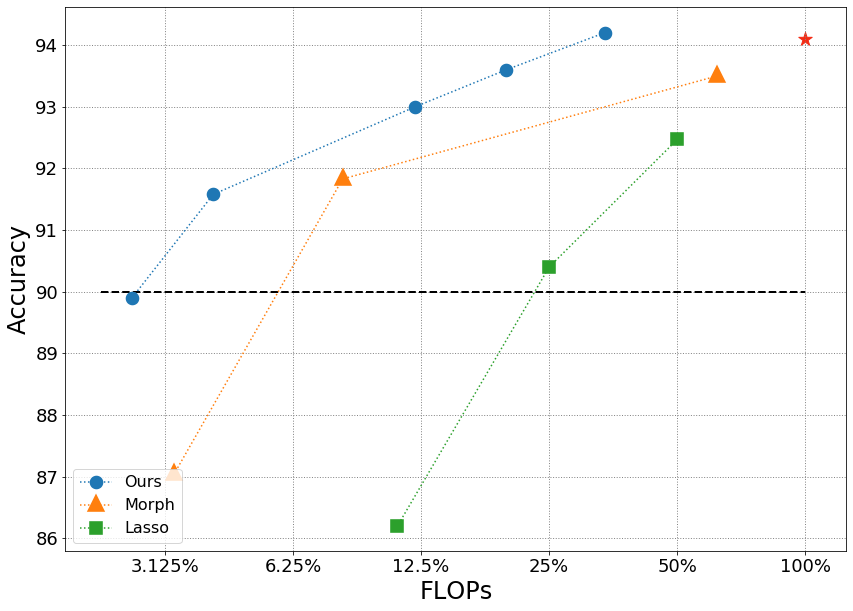

In [38]:
# # ResNet18 Results
# d = {}
# # d["Ours"] = [[ 94.2, 93.6, 93.0,91.6,89.9],[0.5, 0.25, 0.125,0.0493,0.02616]]
# d["Ours"] = [[ 93.9, 93.6, 93.0,91.6,89.9],[0.5, 0.25, 0.125,0.0493,0.02616]]
# d["Morph"] = [[93.5,91.83,87.05],[0.62,0.08182,0.0329]]
# d["Lasso"] = [[92.47,90.4,86.2],[0.5,0.25,0.11]]


# ResNet50
# d = {}
# BASELINE = 94.0
# d["Ours"] = [[ 94.2, 93.6, 93.0,91.58,89.9],[0.3374, 0.1982, 0.12112,0.04063,0.02616]]
# d["Morph"] = [[94.4,91.83,87.05],[0.5,0.08182,0.0329]]
# d["Lasso"] = [[92.47,90.4,86.2],[0.5,0.25,0.11]]

# ResNet56
# d = {}
# BASELINE = 93.12
# d["Ours"] = [[93.08,92.91,92.2],[0.707,0.478,0.326]]
# d["Lasso"] = [[92.06,89.78,89.06],[0.69,0.45,0.38]]
# d["Morph"] = [[91.71,90.1,88.72],[0.692,0.519,0.397]]
# d["Variational"] = [[92.26],[0.797]]
# d["PFEC"] = [[91.3],[0.747]]
# d["AMC"] = [[91.9],[0.5]]
# d["CP"] = [[91.8],[0.5]]
# d["SFP"] = [[92.26],[0.474]]
# d["FPGM"] = [[92.93],[0.474]]
# d["LCCL"] = [[92.8],[0.621]]

# d = {}
# BASELINE = 92.17
# d["Ours"] = [[92.1,91.3,90.24],[0.74,0.501,0.325]]
# d["Lasso"] = [[91.08,89.78,89.06],[0.738,0.518,0.346]]
# d["Morph"] = [[90.64,90.1,88.72],[0.749,0.471,0.305]]
# d["Variational"] = [[91.66],[0.835]]
# d["SFP"] = [[90.83],[0.578]]
# d["FPGM"] = [[91.09],[0.578]]
# d["LCCL"] = [[91.68],[0.64]]

# ResNet18 Results
d = {}
BASELINE = 94.1
d["Ours"] = [[ 94.2, 93.6, 93.0,91.58,89.9],[0.3374, 0.1982, 0.12112,0.04063,0.02616]]
d["Morph"] = [[93.5,91.83,87.05],[0.62,0.08182,0.0329]]
d["Lasso"] = [[92.47,90.4,86.2],[0.5,0.25,0.11]]

fig, ax = plt.subplots(figsize=[14,10])
# fig.suptitle("Scatter Example",c="white")
# plt.title("Scatter Example", c="white")
# ax.set_title("ResNet50", c="white",fontsize=24)
# fig.tight_layout()
ax.grid(b=True, linestyle=':', linewidth='1', color='#858585')
plt.xlabel("FLOPs",fontsize=24)
plt.ylabel("Accuracy",fontsize=24)
# plt.xlim([0,5])
plt.xticks(np.arange(-5,1),("3.125%","6.25%","12.5%","25%","50%","100%"),fontsize=18)
# plt.xticks([np.log2(0.33),np.log2(0.5),np.log2(0.75)],("33%","50%","75%"),fontsize=10)
plt.yticks(fontsize=18)


markers = ["o","^","s","p","d","h","H","8","x","v"]
for idx, name in enumerate(d.keys()):
    # ax.scatter(np.log2(d[name][1]),d[name][0],s=100,marker=markers[idx])
    ax.plot(np.log2(d[name][1]),d[name][0],linestyle=":",label=name,
            mew=7.6,marker=markers[idx])
ax.scatter(0,BASELINE,marker="*",s=200,alpha=1,color="#f42b14")
ax.legend(fontsize=16,loc="lower left")
# ax.scatter(x,y,color="#3e74c7",marker="s")
# ax.scatter(y,x,color="#9fb9e3",marker="p")
plt.hlines(90,-5.5,0,lw = 2,linestyle="--")
#plt.savefig("res18.pdf")
plt.savefig("res18.pdf")



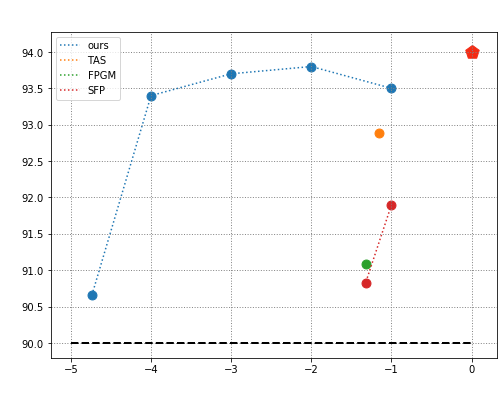